# Graduate Rotational Internship Program(GRIP)
# Data Science and Business Analytics
## Name : Eslam Khaled Abo AlNaga
## Task : Prediction Using Decision Tree Algorithm
## Create The Decision Tree Classifier and Visualze it Graphically
### Link to Dataset:https://bit.ly/3kXTdox

## Exploring the Data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from time import time
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load the Census dataset
data = pd.read_csv("Iris.csv")

# Success - Display the first 10 records
display(data.head(n=10))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## Data Exploration

In [2]:
# Quick look at the data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
# Findiang missing values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.duplicated().sum()

0

In [6]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
data = data.drop('Id', axis=1)

data.shape

(150, 5)

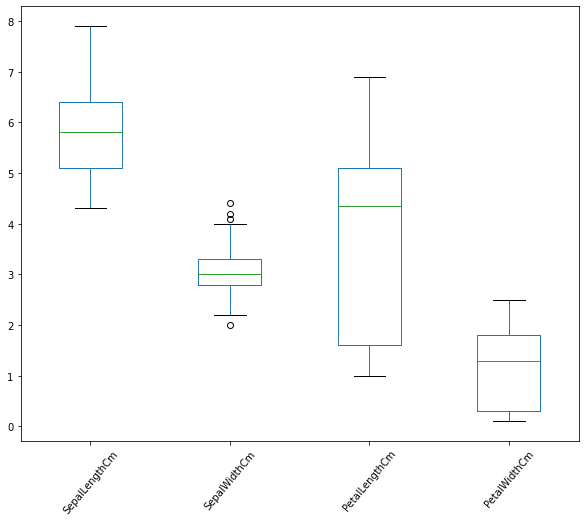

In [8]:
boxplot = data.boxplot(grid=False, rot=50, figsize=(10, 8));

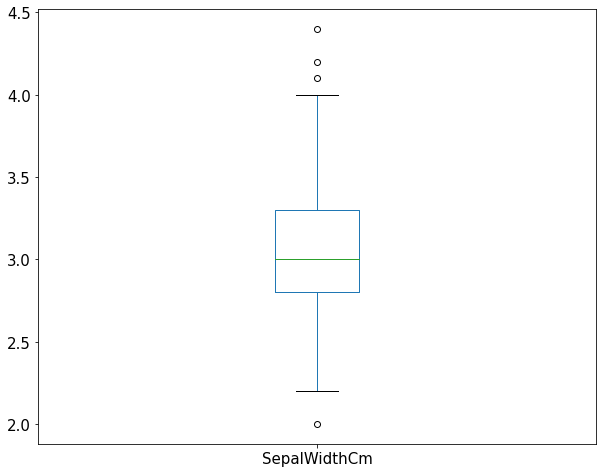

In [9]:
boxplot = data.boxplot(grid=False, fontsize=15, 
                                     column=['SepalWidthCm'], figsize=(10, 8));

In [10]:
num_features=[i for i in data.columns if data.dtypes[i]!='object']
num_features=[e for e in num_features if e not in ['Species']]
num_features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

### Count of Outliers

In [11]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in num_features:
    count_outliers(data,i)

No outliers in SepalLengthCm
There are outliers in SepalWidthCm
Count of outliers are: 4
No outliers in PetalLengthCm
No outliers in PetalWidthCm


### Feature Engineering

In [12]:
class Clean:
    def __init__(self, dataframe, features):
        self.dataframe = dataframe
        self.columns = features
        
    def get_outliers(self):
        final_indexes = list()
        
        for col in self.columns:
            Q1 = self.dataframe[col].quantile(0.25)
            Q3 = self.dataframe[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - (1.5 * IQR)
            upper_bound = Q3 + (1.5 * IQR)
        
            outliers_indexes = self.dataframe.index[(self.dataframe[col] < lower_bound) | (self.dataframe[col] > upper_bound)]
            for index in outliers_indexes:
                if index not in final_indexes:
                    final_indexes.append(index)
                    
        return final_indexes
    
    def remove_outliers(self):
        remove_indexes = self.get_outliers()
        currated_dataframe = self.dataframe.drop(self.dataframe.index[[remove_indexes]])
        currated_dataframe.reset_index(inplace=True)
        
        return currated_dataframe.drop('index', axis = 1)

In [13]:
num_feats = [col for col in data.select_dtypes(include=np.number).columns]
cat_feats = [col for col in data.select_dtypes(include=np.object).columns]

data = Clean(data, ['SepalWidthCm'])
cleaned_data = data.remove_outliers()
cleaned_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,Iris-virginica
142,6.3,2.5,5.0,1.9,Iris-virginica
143,6.5,3.0,5.2,2.0,Iris-virginica
144,6.2,3.4,5.4,2.3,Iris-virginica


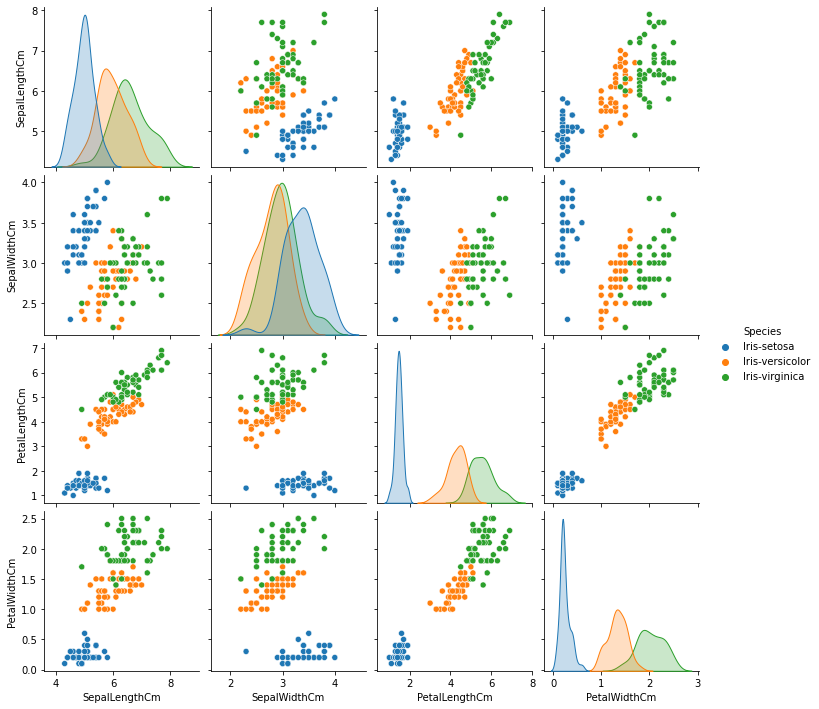

In [14]:
sns.pairplot(cleaned_data,hue='Species')

In [15]:
cleaned_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.113977,0.879374,0.822577
SepalWidthCm,-0.113977,1.000000,-0.397123,-0.329782
PetalLengthCm,0.879374,-0.397123,1.000000,0.961755
PetalWidthCm,0.822577,-0.329782,0.961755,1.000000


<AxesSubplot:>

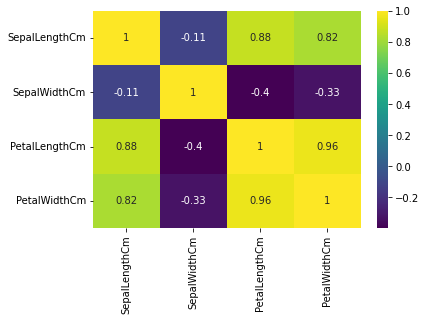

In [16]:
sns.heatmap(cleaned_data.corr(),annot=True,cmap='viridis')

# Spliting data into Train Test split

In [17]:
# X contains feature columns
X=cleaned_data.drop(['Species'],axis=1)
# y contain target column
y=cleaned_data['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 116 samples.
Testing set has 30 samples.


# Training the Decision Tree

In [18]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X,y)*100

98.63013698630137

## Prediction

In [19]:
prediction=dtree.predict(X_test)

In [20]:
compare=pd.DataFrame({'Actual':y_test,'Prediction':prediction})
compare

,Actual,Prediction
45,Iris-setosa,Iris-setosa
97,Iris-virginica,Iris-virginica
27,Iris-setosa,Iris-setosa
19,Iris-setosa,Iris-setosa
42,Iris-setosa,Iris-setosa
120,Iris-virginica,Iris-virginica
29,Iris-setosa,Iris-setosa
80,Iris-versicolor,Iris-versicolor
66,Iris-versicolor,Iris-virginica
18,Iris-setosa,Iris-setosa


## Evaluation

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



In [22]:
print(confusion_matrix(y_test,prediction))

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


# Visualize the Decision Tree

In [23]:
from sklearn.tree import plot_tree

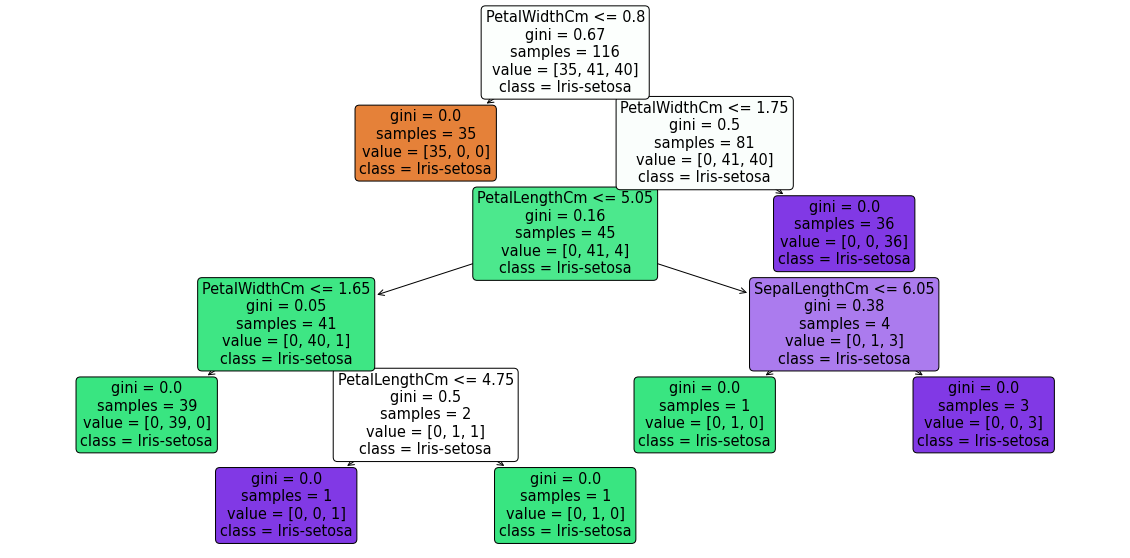

In [24]:
plt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=X.columns,precision=2,rounded=True,filled=True,class_names=y.values)